In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('dataset.csv')
print(data)

          Date    Price    Open     High      Low 
0    09-Jun-24  69348.0  69311.0  69427.0  69137.0
1    08-Jun-24  69310.0  69347.0  69572.0  69222.0
2    07-Jun-24  69348.0  70793.0  71957.0  68621.0
3    06-Jun-24  70792.0  71084.0  71616.0  70179.0
4    05-Jun-24  71084.0  70551.0  71744.0  70397.0
..         ...      ...      ...      ...      ...
362  13-Jun-23  25929.0  25907.0  26429.0  25726.0
363  12-Jun-23  25907.0  25928.0  26081.0  25635.0
364  11-Jun-23  25928.0  25843.0  26190.0  25661.0
365  10-Jun-23  25844.0  26479.0  26525.0  25468.0
366        NaN      NaN      NaN      NaN      NaN

[367 rows x 5 columns]


In [ ]:
data.drop(['Date'], axis=1, inplace=True)

o

In [ ]:
input_features = ['Price']
output_features = ['Price']

In [ ]:
dataset = data.values
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
print(dataset)

[[0.9224383  0.92164713 0.91014    0.9526667 ]
 [0.9216456  0.92239815 0.9131604  0.95449466]
 [0.9224383  0.95256275 0.96283954 0.94157   ]
 ...
 [0.01664722 0.01487368 0.00951922 0.01769894]
 [0.01489484 0.02814108 0.01649725 0.01354837]
 [       nan        nan        nan        nan]]


In [ ]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def scale(train, test):

	scaler = MinMaxScaler(feature_range=(0, 1))
	scaler = scaler.fit(train)

	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)

	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
def winndowed_dataset(series,batch_size,n_past=24,n_future=24,shift=1):
    df=pd.DataFrame(series)
    ds=dataset.from_tensor_slices(df)

In [ ]:
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [ ]:
hist=model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
8/8 - 7s - 907ms/step - loss: 0.2891
Epoch 2/100
8/8 - 0s - 38ms/step - loss: 0.0341
Epoch 3/100
8/8 - 0s - 42ms/step - loss: 0.0132
Epoch 4/100
8/8 - 0s - 35ms/step - loss: 0.0157
Epoch 5/100
8/8 - 0s - 40ms/step - loss: 0.0069
Epoch 6/100
8/8 - 0s - 38ms/step - loss: 0.0065
Epoch 7/100
8/8 - 0s - 29ms/step - loss: 0.0055
Epoch 8/100
8/8 - 0s - 28ms/step - loss: 0.0049
Epoch 9/100
8/8 - 0s - 31ms/step - loss: 0.0041
Epoch 10/100
8/8 - 0s - 45ms/step - loss: 0.0038
Epoch 11/100
8/8 - 0s - 39ms/step - loss: 0.0037
Epoch 12/100
8/8 - 0s - 33ms/step - loss: 0.0036
Epoch 13/100
8/8 - 1s - 67ms/step - loss: 0.0035
Epoch 14/100
8/8 - 0s - 30ms/step - loss: 0.0036
Epoch 15/100
8/8 - 0s - 17ms/step - loss: 0.0036
Epoch 16/100
8/8 - 0s - 17ms/step - loss: 0.0036
Epoch 17/100
8/8 - 0s - 13ms/step - loss: 0.0035
Epoch 18/100
8/8 - 0s - 13ms/step - loss: 0.0036
Epoch 19/100
8/8 - 0s - 13ms/step - loss: 0.0035
Epoch 20/100
8/8 - 0s - 19ms/step - loss: 0.0034
Epoch 21/100
8/8 - 0s - 16ms

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
from sklearn.metrics import r2_score
train_r2 = r2_score(trainY, trainPredict)*100
test_r2 = r2_score(testY, testPredict)*100
print("Train R-squared:", train_r2,"%")
print("Test R-squared:", test_r2,"%")

Train R-squared: 97.68379689239207 %
Test R-squared: 77.52705291210864 %


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(testY, testPredict)
print("MSE:", mse)

MSE: 0.00036484067


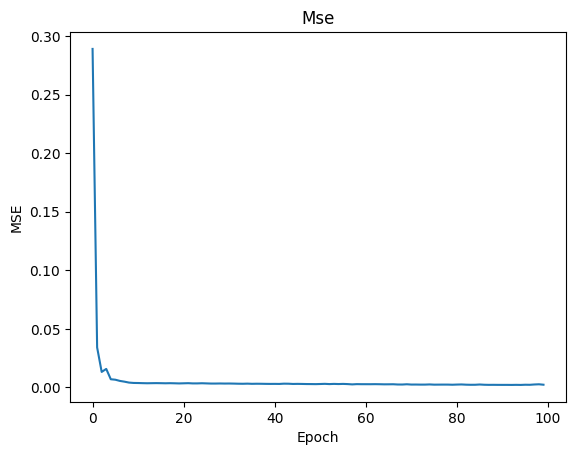

In [ ]:
model_history = hist.history
loss = model_history['loss']

plt.figure()
plt.plot(loss, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mse')
plt.show()

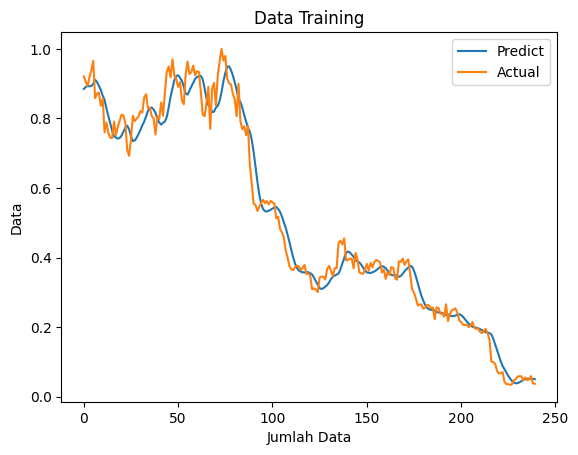

In [ ]:
plt.plot(trainPredict, label='Predict')
plt.plot(trainY, label='Actual')
plt.xlabel('Jumlah Data')
plt.ylabel('Data')
plt.title('Data Training')
plt.legend()
plt.show()

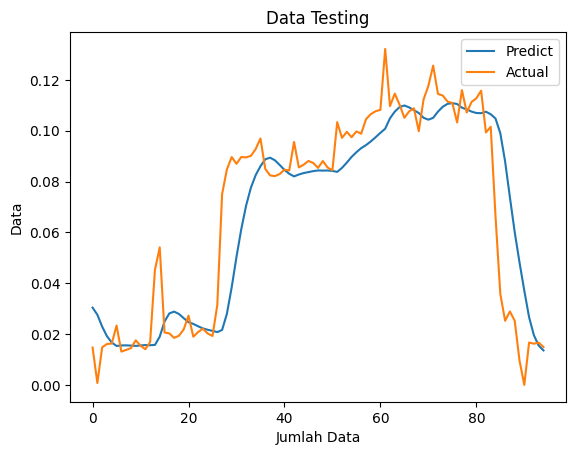

In [ ]:
plt.plot(testPredict, label='Predict')
plt.plot(testY, label='Actual')
plt.xlabel('Jumlah Data')
plt.ylabel('Data')
plt.title('Data Testing')
plt.legend()
plt.show()
plt.show()

In [ ]:
all_predictions = testPredict
all_actual = testY

df = pd.DataFrame({
    'Predictions': all_predictions.flatten(),
    'Actual': all_actual.flatten()
})

df.to_csv('predictions.csv', index=False)

In [ ]:
print(df)

    Predictions    Actual
0      0.030411  0.014707
1      0.027612  0.000751
2      0.022938  0.014811
3      0.019148  0.016084
4      0.016672  0.016272
..          ...       ...
90     0.037091  0.000000
91     0.026643  0.016668
92     0.019553  0.016209
93     0.015472  0.016647
94     0.013566  0.014895

[95 rows x 2 columns]


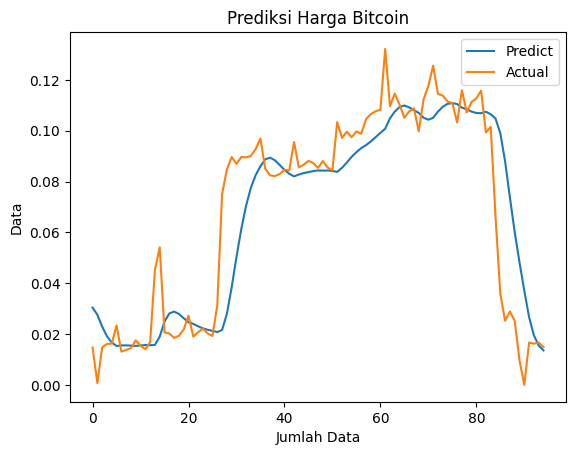

In [ ]:
plt.plot(all_predictions, label='Predict')
plt.plot(all_actual, label='Actual')
plt.xlabel('Jumlah Data')
plt.ylabel('Data')
plt.title('Prediksi Harga Bitcoin')
plt.legend()
plt.show()
plt.show()

In [ ]:
d_min_actual = min(testY)
d_max_actual = max(testY)
print(d_min_actual)
print(d_max_actual)

0.0
0.13217622


In [ ]:
denorm_actual = (data[' Price'][:95] * (d_max_actual - d_min_actual) + d_min_actual)

In [ ]:
d_min_predict = min(testPredict)
d_max_predict = max(testPredict)
print(d_min_predict)
print(d_max_predict)

[0.01356633]
[0.11084467]


In [ ]:
denorm_predict = (data[' Price'][:95] * (d_max_predict - d_min_predict) + d_min_predict)

In [ ]:
hasil = pd.DataFrame({
    'Actual': denorm_actual,
    'Predict': denorm_predict
})
print(hasil)
hasil.to_excel('hasil.xlsx', index=False)

         Actual      Predict
0   9166.156533  6746.072003
1   9161.133837  6742.375426
2   9166.156533  6746.072003
3   9357.018996  6886.541928
4   9395.614452  6914.947204
..          ...          ...
90  9529.773316  7013.684721
91  9115.533041  6708.814398
92  9036.491661  6650.641950
93  9010.717298  6631.672673
94  8836.641216  6503.557097

[95 rows x 2 columns]


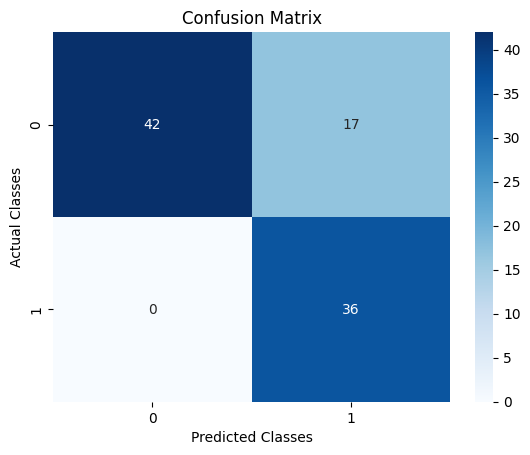

Accuracy: 82.10526315789474 %
Precision: 0.6792452830188679
Recall: 1.0
f1_score: 0.8089887640449438


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # Import the necessary functions
import matplotlib.pyplot as plt
import seaborn as sns

y_test_norm = (testY - testY.min()) / (testY.max() - testY.min())
y_pred_norm = (testPredict - testPredict.min()) / (testPredict.max() - testPredict.min())

threshold = 0.7

y_test_classes = np.where(y_test_norm > threshold, 1, 0)
y_pred_classes = np.where(y_pred_norm > threshold, 1, 0)

cm = confusion_matrix(y_test_classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix")
plt.show()

Accuracy = accuracy_score(y_test_classes, y_pred_classes)*100
Precision = precision_score(y_test_classes, y_pred_classes)
Recall = recall_score(y_test_classes, y_pred_classes)
f1_score = f1_score(y_test_classes, y_pred_classes)

print("Accuracy:", Accuracy, "%")
print("Precision:", Precision)
print("Recall:", Recall)
print("f1_score:", f1_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        59
           1       0.68      1.00      0.81        36

    accuracy                           0.82        95
   macro avg       0.84      0.86      0.82        95
weighted avg       0.88      0.82      0.82        95

